In [1]:
import lifelines
lifelines.__version__

'0.27.3'

In [2]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

In [3]:
N = 25

CURRENT_TIME = 10

In [4]:
actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])

In [5]:
actual_lifetimes

array([1.98631211e+00, 1.05753035e+01, 3.11271826e-02, 7.05980900e+00,
       1.75940752e-01, 7.86493006e+01, 1.09089640e+00, 1.80182904e+01,
       1.89501229e+01, 1.61853444e+00, 4.13848295e-02, 2.90577144e-01,
       1.90053932e+00, 2.95447071e+01, 9.16450315e-01, 3.38268731e+00,
       3.33412980e+00, 3.45567557e+00, 1.03391305e+00, 6.73090921e+00,
       1.59747320e+01, 2.19654578e+00, 1.30505328e-01, 2.58913372e-01,
       4.52388878e+00])

In [6]:
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
observed_lifetimes

array([ 1.98631211, 10.        ,  0.03112718,  7.059809  ,  0.17594075,
       10.        ,  1.0908964 , 10.        , 10.        ,  1.61853444,
        0.04138483,  0.29057714,  1.90053932, 10.        ,  0.91645032,
        3.38268731,  3.3341298 ,  3.45567557,  1.03391305,  6.73090921,
       10.        ,  2.19654578,  0.13050533,  0.25891337,  4.52388878])

In [7]:
death_observed = actual_lifetimes < CURRENT_TIME
death_observed

array([ True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True])

Observed lifetimes at time 10:
 [ 1.98631211 10.          0.03112718  7.059809    0.17594075 10.
  1.0908964  10.         10.          1.61853444  0.04138483  0.29057714
  1.90053932 10.          0.91645032  3.38268731  3.3341298   3.45567557
  1.03391305  6.73090921 10.          2.19654578  0.13050533  0.25891337
  4.52388878]


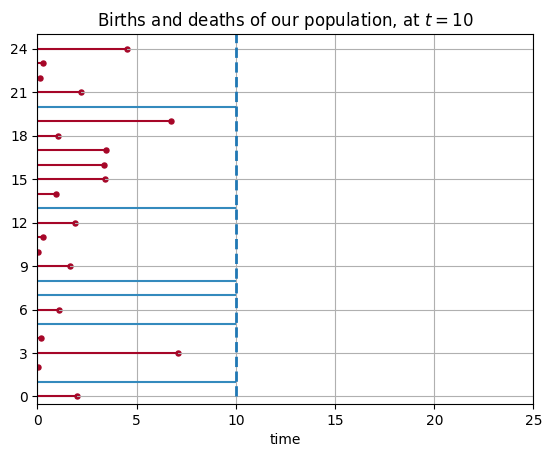

In [10]:
ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed, sort_by_duration=False)
ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
ax.grid()
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

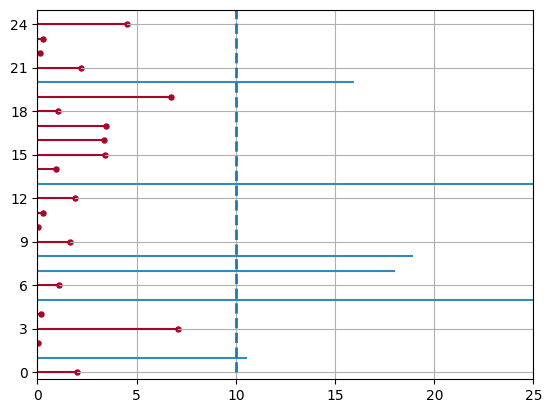

In [13]:
ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed, sort_by_duration=False)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 25)
ax.grid()